<div style="background-color:#057BA3; padding:6px; color:#ffffff;">

## IUCAA Finesse Workshop 18-22nd Dec 2019
</div>


# Modulation

These tasks are designed to introduce you working with multiple frequency components in Finesse. Later we'll look at how these can be used to create control signals for interferometers.

This session is based on the GWoptics.org <a href=http://www.gwoptics.org/learn/index.html>Learn Laser Interferometry</a> course, with some extensions and adaptations.

## Goal of the session

**Finesse/Pykat things you will learn**:
 - The `mod` and `ad` components

## Getting Started

As usual, we start by loading PyKat and the other Python packages we will need:

(type shift+enter to run)

In [ ]:
from pykat import finesse        # import the whole pykat.finesse package
from pykat.commands import *     # import all packages in pykat.commands
import numpy as np               # for basic math/sci/array functions
import matplotlib.pyplot as plt  # for plotting

# tell the notebook to automatically show plots inline below each cell
%matplotlib inline               
# use pykat's plotting style. change dpi to change plot sizes on your screen
pykat.init_pykat_plotting(dpi=90)

## Frequencies in Finesse

Finesse is a frequency domain simulation tool. Each component of the optical field is perfect delta function at the specified frequency, and only frequencies that are explicitly defined are included in the calculation. Finesse defines *three* categories of frequency component:
 * the **carrier** -- the main optical field, supplied by the laser;
 * **sidebands** -- generated by modulating the field, usually using a modulator component; and 
 * **signals** -- which are also generated by modulating the field, but are assumed to be small enough that they couple negligible power from the carrier. 
 
The carrier frequency in Finesse is $c_0/1064{\rm nm}$ unless the user specifies a frequency offset in the `laser` component, or overwrites the default wavelength in their `kat.ini` file or using the `lambda` command. 

Sidebands are usually radio-frequency (RF) modulations applied to the carrier so that the <a href="">beat signal</a> generated between the sidebands and the carrier can be used to measure a behaviour in the optical system and control it. Signals are typically injected to calculate responses. You will learn more about signals later.


## Tasks

In this example we use a laser and an *Electro-Optic Modulator* (EOM, keyword `mod`) to show how the amplitude of the carrier and the sidebands varies with the modulation index $m$.  We use *amplitude detectors* (keyword `ad`) to look at the amplitude of the frequency components. Unfortunately amplitude detectors do not exist in reality, but a nice property of numerical models is that we can make impossible "measurements" and find out more about the system. (You've previously seen an example of this when using a `pd` component inside a cavity without affecting the measured field).

<div style="background-color:#cceffc;padding:10px;">

### Task 1: Adding sidebands to a laser

Write Finesse code to model a laser outputting 1W of power that is incident on a *modulator* 1m away. Make two versions of the simulation, using 
 * an amplitude modulator
 * a phase modulator
 
each with a single pair of sidebands with frequency 1kHz and modulation depth 0.3.

</div>

You may find it helpful to check the <a href="http://www.gwoptics.org/finesse/reference/">Syntax Reference</a>

<div style="background-color:#cceffc;padding:10px;">

### Task 2: Power Conservation

1. Add the following detectors to measure the output of the modulator for both simulations:
     * a `pd` to measure the total DC power in the transmitted field
     * several `ad`s, to measure the amplitude of each frequency component
   The full optical configuration should look like this:
   <img src="http://www.gwoptics.org/learn/02_Plane_waves/03_Optical_modulation/phase_modulation.svg" width=40%>


2. Plot the outputs for all the *amplitude* detectors as the modulation depth is varied from 0 to 1


3. Use appropriate mathematical operations (with Python) to reconstruct the total power in the field from the outputs of the `ad` detectors. Does this match the power measured by the `pd`?

   **Hint:** The units of the `ad` detector are $\sqrt(W)$ - see <a href="https://link.springer.com/article/10.1007/s41114-016-0002-8#Sec27">section 4 of the Liiving Review</a>. By default, Finesse will output the absolute value of each detector (i.e. `yaxis abs`). 
   
   
4. Can you explain why the plots produced in (2) and (3) look this way? Does this make physical sense? What happens when additional pairs of sidebands are added to the phase modulator? You may wish to plot the phase modulator simulation over a larger range of modulation depths.

</div>



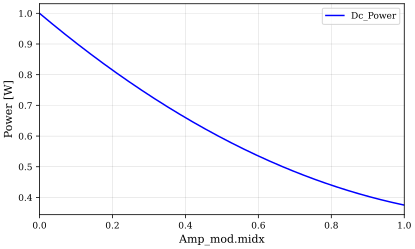

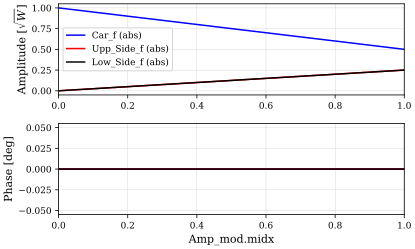

Total Power for midx= 0.0 : 1.0000000000000004
Total Power for midx= 0.005 : 0.9950093750000003
Total Power for midx= 0.01 : 0.9900375000000002
Total Power for midx= 0.015 : 0.9850843750000003
Total Power for midx= 0.02 : 0.9801500000000002
Total Power for midx= 0.025 : 0.9752343750000003
Total Power for midx= 0.03 : 0.9703375000000002
Total Power for midx= 0.035 : 0.9654593750000002
Total Power for midx= 0.04 : 0.9606000000000001
Total Power for midx= 0.045 : 0.9557593750000003
Total Power for midx= 0.05 : 0.9509375000000004
Total Power for midx= 0.055 : 0.9461343750000003
Total Power for midx= 0.06 : 0.9413500000000004
Total Power for midx= 0.065 : 0.9365843750000005
Total Power for midx= 0.07 : 0.9318375000000004
Total Power for midx= 0.075 : 0.9271093750000005
Total Power for midx= 0.08 : 0.9224000000000002
Total Power for midx= 0.085 : 0.9177093750000005
Total Power for midx= 0.09 : 0.9130375000000001
Total Power for midx= 0.095 : 0.9083843750000002
Total Power for midx= 0.1 : 0.9

In [23]:
Dc=[]
upp_s_a=[]
low_s_a=[]
car_a=[]

import finesse
finesse.configure(plotting=True)
#creating a model for amplitude modulator
model=finesse.Model()
model.parse("""
l laser P=1 f=0
s space laser.p1 Amp_mod.p1 L=1
mod Amp_mod f=1000 midx=0.3 order=1 mod_type=am
pd Dc_Power Amp_mod.p2.o
ad Car_f Amp_mod.p2.o f=0
ad Upp_Side_f Amp_mod.p2.o f=1000
ad Low_Side_f Amp_mod.p2.o f=-1000
""")

model.parse("xaxis(Amp_mod.midx,lin,0,1,200)")
out1=model.run()
out1.plot()
for i in range(201):
    Dc.append(out1["Dc_Power"][i])
    upp_s_a.append(out1["Upp_Side_f"][i])
    low_s_a.append(out1["Low_Side_f"][i])
    car_a.append(out1["Car_f"][i])
#Displaying the total power carried by the modulated signal
for i in range(201):
    print("Total Power for midx=",0.005*i,":",abs(upp_s_a[i])**2+abs(low_s_a[i])**2+abs(car_a[i])**2)

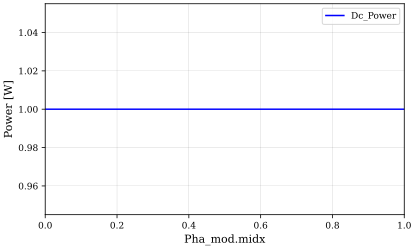

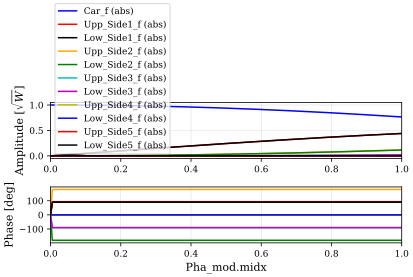

Total Power for midx= 0.0 : 1.0000000000000004
Total Power for midx= 0.005 : 1.0000000000000004
Total Power for midx= 0.01 : 1.0
Total Power for midx= 0.015 : 1.0
Total Power for midx= 0.02 : 1.0000000000000004
Total Power for midx= 0.025 : 1.0000000000000004
Total Power for midx= 0.03 : 1.0000000000000004
Total Power for midx= 0.035 : 1.0000000000000002
Total Power for midx= 0.04 : 1.0000000000000002
Total Power for midx= 0.045 : 1.0
Total Power for midx= 0.05 : 1.0
Total Power for midx= 0.055 : 1.0000000000000002
Total Power for midx= 0.06 : 1.0
Total Power for midx= 0.065 : 1.0
Total Power for midx= 0.07 : 1.0
Total Power for midx= 0.075 : 0.9999999999999999
Total Power for midx= 0.08 : 1.0000000000000002
Total Power for midx= 0.085 : 1.0
Total Power for midx= 0.09 : 1.0
Total Power for midx= 0.095 : 1.0
Total Power for midx= 0.1 : 1.0000000000000004
Total Power for midx= 0.105 : 1.0000000000000004
Total Power for midx= 0.11 : 0.9999999999999999
Total Power for midx= 0.115 : 1.00000

In [58]:
Dc1=[]
car_a1=[]
upp_s_a_1=[]
low_s_a_1=[]
upp_s_a_2=[]
low_s_a_2=[]
upp_s_a_3=[]
low_s_a_3=[]
upp_s_a_4=[]
low_s_a_4=[]
upp_s_a_5=[]
low_s_a_5=[]
for j in range(201):
    P_j=0
#creating a model for phase modulator

model2=finesse.Model()
model2.parse("""
l laser P=1
s space laser.p1 Pha_mod.p1 L=1
mod Pha_mod f=1000 midx=0.3 order=5 mod_type=pm
pd Dc_Power Pha_mod.p1
ad Car_f Pha_mod.p2.o f=0
ad Upp_Side1_f Pha_mod.p2.o f=1000
ad Low_Side1_f Pha_mod.p2.o f=-1000
ad Upp_Side2_f Pha_mod.p2.o f=2000
ad Low_Side2_f Pha_mod.p2.o f=-2000
ad Upp_Side3_f Pha_mod.p2.o f=3000
ad Low_Side3_f Pha_mod.p2.o f=-3000
ad Upp_Side4_f Pha_mod.p2.o f=4000
ad Low_Side4_f Pha_mod.p2.o f=-4000
ad Upp_Side5_f Pha_mod.p2.o f=5000
ad Low_Side5_f Pha_mod.p2.o f=-5000
""")
model2.parse("xaxis(Pha_mod.midx,lin,0,1,200)")
out2=model2.run()
out2.plot()

for i in range(201):
    Dc1.append(out2["Dc_Power"][i])
    car_a1.append(out2["Car_f"][i])
    upp_s_a_1.append(out2["Upp_Side1_f"][i])
    upp_s_a_2.append(out2["Upp_Side2_f"][i])
    upp_s_a_3.append(out2["Upp_Side3_f"][i])
    upp_s_a_4.append(out2["Upp_Side4_f"][i])
    upp_s_a_5.append(out2["Upp_Side5_f"][i])
#Displaying the total power carried by the modulated signal
for i in range(201):
    print("Total Power for midx=",0.005*i,":",abs(car_a1[i])**2+2*(abs(upp_s_a_1[i])**2+abs(upp_s_a_2[i])**2+abs(upp_s_a_3[i])**2+abs(upp_s_a_4[i])**2+abs(upp_s_a_5[i])**2))